# Importing libraries 

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#checking matplotlib version to prevent errors
matplotlib.__version__

'3.7.2'

In [3]:
#ensure charts created don't need to be called 
%matplotlib inline

# Importing Data 

In [4]:
#creating a path variable for orginal data
path = r'/Users/scarlettgrim/Python Projects/04-2024 Denver Airbnb Analysis'

In [5]:
#checking path variable output 
path

'/Users/scarlettgrim/Python Projects/04-2024 Denver Airbnb Analysis'

In [6]:
#using path variable to import denver_airbnb.csv
df_airbnb = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'listings_checked.csv'), index_col = False)

# Additional Cleaning 

In [7]:
#looking at variables to see what would be best for my subset 
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4817 entries, 0 to 4816
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   4817 non-null   int64  
 1   id                           4817 non-null   int64  
 2   host_id                      4817 non-null   int64  
 3   host_since                   4817 non-null   object 
 4   host_is_superhost            4817 non-null   object 
 5   location                     4817 non-null   object 
 6   latitude                     4817 non-null   float64
 7   longitude                    4817 non-null   float64
 8   property_type                4817 non-null   object 
 9   room_type                    4817 non-null   object 
 10  guest_count                  4817 non-null   int64  
 11  bathrooms                    4817 non-null   object 
 12  beds                         4817 non-null   float64
 13  price             

In [8]:
#deleting the new index column I don't need 
df_airbnb.drop(columns = ['Unnamed: 0'], inplace = True)

In [9]:
#changing host_is_superhost to a boolean 
df_airbnb['host_is_superhost'] = df_airbnb['host_is_superhost'].map({'t': True, 'f': False})
df_airbnb['host_is_superhost'] = df_airbnb['host_is_superhost'].astype(bool)

In [10]:
#converting host_since to datetime
df_airbnb['host_since'] = pd.to_datetime(df_airbnb['host_since'])

In [11]:
#trying to understand how to clean the bathrooms column
unique_bathrooms = df_airbnb['bathrooms'].unique()

In [12]:
#looking at all unique values
print(unique_bathrooms)

['1 shared bath' '2 baths' '2.5 baths' '1 bath' '4 baths' '3.5 baths'
 '1 private bath' '1.5 baths' '3 baths' '2 shared baths' '4.5 baths'
 '6 baths' '5 baths' '1.5 shared baths' '5.5 baths' '3 shared baths'
 '4 shared baths' '17 shared baths' '2.5 shared baths' '6.5 baths'
 '0 baths' 'Half-bath']


In [13]:
#extracting numeric variables
df_airbnb['bathrooms'] = df_airbnb['bathrooms'].str.extract('(\d+\.?\d*)', expand=False)

In [14]:
#converting half to 0.5
df_airbnb['bathrooms'] = df_airbnb['bathrooms'].replace('Half', '0.5')

In [15]:
#converting bathrooms column to a numeric data type
df_airbnb['bathrooms'] = pd.to_numeric(df_airbnb['bathrooms'], errors='coerce')

In [16]:
print(df_airbnb['bathrooms'].unique())

[ 1.   2.   2.5  4.   3.5  1.5  3.   4.5  6.   5.   5.5 17.   6.5  0.
  nan]


In [17]:
df_airbnb['bathrooms'].value_counts(dropna = False)

bathrooms
1.0     3053
2.0      742
2.5      322
1.5      277
3.0      156
3.5      151
4.0       65
4.5       27
5.0        9
5.5        6
6.0        3
6.5        2
0.0        2
17.0       1
NaN        1
Name: count, dtype: int64

In [18]:
df_airbnb.dropna(subset = ['bathrooms'], inplace = True)

In [19]:
#creating a new column called entire_home_apt that is true if the airbnb is an entire home and false if it is a private room and this will hold a boolean value
df_airbnb['entire_home_apt'] = (df_airbnb['room_type'] == 'Entire home/apt').astype(bool)

In [20]:
#trying to see why price is an object instead of a float or integer
print(df_airbnb['price'].head())

0     $35.00
1    $149.00
2    $190.00
3     $87.00
4    $300.00
Name: price, dtype: object


In [21]:
#trying to see why price is an object instead of a float or integer
print(df_airbnb['price'].unique())

['$35.00' '$149.00' '$190.00' '$87.00' '$300.00' '$408.00' '$121.00'
 '$561.00' '$128.00' '$93.00' '$319.00' '$143.00' '$165.00' '$33.00'
 '$295.00' '$60.00' '$141.00' '$192.00' '$90.00' '$65.00' '$86.00'
 '$130.00' '$95.00' '$276.00' '$157.00' '$68.00' '$88.00' '$150.00'
 '$135.00' '$110.00' '$850.00' '$82.00' '$120.00' '$84.00' '$104.00'
 '$77.00' '$129.00' '$115.00' '$521.00' '$108.00' '$314.00' '$203.00'
 '$156.00' '$180.00' '$103.00' '$139.00' '$92.00' '$91.00' '$50.00'
 '$94.00' '$99.00' '$71.00' '$147.00' '$126.00' '$207.00' '$43.00'
 '$78.00' '$399.00' '$227.00' '$210.00' '$131.00' '$824.00' '$250.00'
 '$107.00' '$61.00' '$83.00' '$66.00' '$56.00' '$160.00' '$76.00' '$75.00'
 '$63.00' '$125.00' '$96.00' '$198.00' '$85.00' '$100.00' '$197.00'
 '$205.00' '$81.00' '$219.00' '$111.00' '$105.00' '$152.00' '$350.00'
 '$148.00' '$562.00' '$251.00' '$97.00' '$55.00' '$45.00' '$166.00'
 '$261.00' '$70.00' '$234.00' '$254.00' '$89.00' '$195.00' '$119.00'
 '$457.00' '$146.00' '$137.00' '$

In [22]:
#removing dollar sign from price
df_airbnb['price'] = df_airbnb['price'].str.replace('$', '')

In [23]:
#converting price to a numeric data type
df_airbnb['price'] = pd.to_numeric(df_airbnb['price'], errors='coerce')

In [24]:
print(df_airbnb['price'].unique())

[ 35. 149. 190.  87. 300. 408. 121. 561. 128.  93. 319. 143. 165.  33.
 295.  60. 141. 192.  90.  65.  86. 130.  95. 276. 157.  68.  88. 150.
 135. 110. 850.  82. 120.  84. 104.  77. 129. 115. 521. 108. 314. 203.
 156. 180. 103. 139.  92.  91.  50.  94.  99.  71. 147. 126. 207.  43.
  78. 399. 227. 210. 131. 824. 250. 107.  61.  83.  66.  56. 160.  76.
  75.  63. 125.  96. 198.  85. 100. 197. 205.  81. 219. 111. 105. 152.
 350. 148. 562. 251.  97.  55.  45. 166. 261.  70. 234. 254.  89. 195.
 119. 457. 146. 137. 114.  98. 188. 132. 134.  46.  42.  57. 118. 299.
 329. 456.  58. 907.  73. 348. 184.  36.  59. 200. 650. 206. 450. 186.
 113. 175. 260. 109. 170. 218.  nan 243. 171. 224. 158.  69. 185. 255.
  44. 505. 138.  67.  72. 500. 212. 370.  41.  62. 488.  80. 204. 298.
  51. 347. 145. 161.  53. 168. 395. 155.  54. 220. 133. 244. 122. 315.
 296. 230. 182. 271. 378.  38. 181. 176. 208. 529. 325. 349. 339. 153.
  74. 169. 213. 279. 369. 116. 425. 417. 966. 249. 154. 172. 282. 464.
 795. 

In [25]:
#changing instant_bookable to a boolean 
df_airbnb['instant_bookable'] = df_airbnb['instant_bookable'].map({'t': True, 'f': False})
df_airbnb['instant_bookable'] = df_airbnb['instant_bookable'].astype(bool)

In [26]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4816 entries, 0 to 4816
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           4816 non-null   int64         
 1   host_id                      4816 non-null   int64         
 2   host_since                   4816 non-null   datetime64[ns]
 3   host_is_superhost            4816 non-null   bool          
 4   location                     4816 non-null   object        
 5   latitude                     4816 non-null   float64       
 6   longitude                    4816 non-null   float64       
 7   property_type                4816 non-null   object        
 8   room_type                    4816 non-null   object        
 9   guest_count                  4816 non-null   int64         
 10  bathrooms                    4816 non-null   float64       
 11  beds                         4816 non-null   flo

# Exploring relationships

# Correlations

In [27]:
#creating a subset with only the columns I want to conduct my visual analysis on

columns_to_keep = ['host_is_superhost','latitude', 'longitude', 'entire_home_apt', 'guest_count', 'bathrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights','availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews','number_of_reviews_ltm', 'number_of_reviews_l30d','review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'reviews_per_month']
df_bnb_selected = df_airbnb[columns_to_keep]

In [28]:
df_bnb_selected.corr()

,host_is_superhost,latitude,longitude,entire_home_apt,guest_count,bathrooms,beds,price,minimum_nights,maximum_nights,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
host_is_superhost,1.000000,0.010795,-0.049195,0.085165,0.032426,-0.008810,0.021171,0.019236,-0.208590,-0.060189,...,0.362294,0.169196,0.301382,0.295047,0.297991,0.294968,0.287183,0.301105,-0.014483,0.303004
latitude,0.010795,1.000000,0.113361,0.004067,0.018538,0.019750,0.004849,0.037814,-0.097141,-0.008548,...,0.065629,0.053304,0.060273,0.060136,0.060958,0.057151,0.057014,0.060172,0.012731,0.087987
longitude,-0.049195,0.113361,1.000000,-0.200472,0.005459,0.031156,0.028116,-0.072000,0.052958,0.017585,...,-0.009585,-0.005323,-0.022190,-0.018715,-0.018174,-0.021075,-0.018020,-0.017965,-0.003560,-0.015013
entire_home_apt,0.085165,0.004067,-0.200472,1.000000,0.299580,0.141077,0.215502,0.238982,0.011845,0.063423,...,0.039176,0.042802,0.043927,0.043305,0.044347,0.039838,0.038172,0.033926,0.003235,0.046204
guest_count,0.032426,0.018538,0.005459,0.299580,1.000000,0.642460,0.881951,0.629962,-0.170232,0.004457,...,0.035942,0.050938,0.059599,0.056000,0.056297,0.055892,0.052823,0.060820,0.057767,0.038846
bathrooms,-0.008810,0.019750,0.031156,0.141077,0.642460,1.000000,0.606887,0.626796,-0.069488,-0.008172,...,-0.089585,-0.043468,-0.034795,-0.037909,-0.039881,-0.040417,-0.039385,-0.035123,0.012538,-0.104518
beds,0.021171,0.004849,0.028116,0.215502,0.881951,0.606887,1.000000,0.581606,-0.149650,0.003750,...,0.025409,0.035687,0.052798,0.048848,0.048671,0.049558,0.048503,0.055681,0.023681,0.021327
price,0.019236,0.037814,-0.072000,0.238982,0.629962,0.626796,0.581606,1.000000,-0.174157,0.004123,...,-0.020075,-0.027520,0.036428,0.030799,0.035672,0.031042,0.030694,0.032986,0.018540,-0.017375
minimum_nights,-0.208590,-0.097141,0.052958,0.011845,-0.170232,-0.069488,-0.149650,-0.174157,1.000000,0.134632,...,-0.413616,-0.299158,-0.260682,-0.260401,-0.262600,-0.257857,-0.253451,-0.267643,-0.068423,-0.425509
maximum_nights,-0.060189,-0.008548,0.017585,0.063423,0.004457,-0.008172,0.003750,0.004123,0.134632,1.000000,...,-0.056034,-0.040489,0.061238,0.064481,0.065465,0.066309,0.066786,0.056002,0.037366,-0.064920


# Creating a correlation heatmap using matplotlib

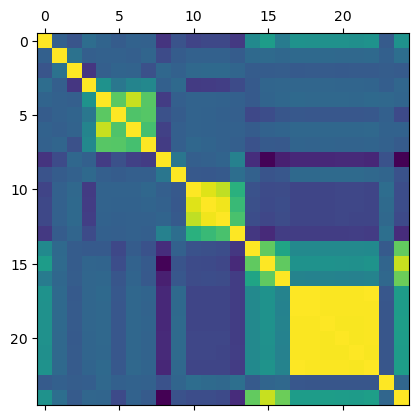

In [29]:
#create a correlation heatmap using matplotlib 
plt.matshow(df_bnb_selected.corr())
plt.show()

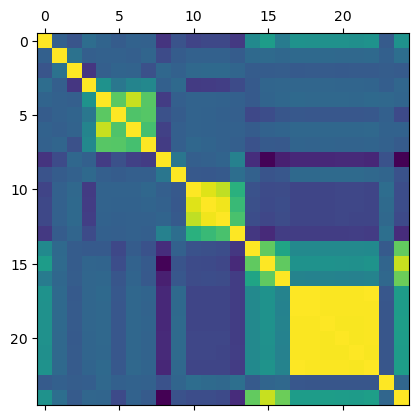

In [30]:
#save figure 
plt.matshow(df_bnb_selected.corr())
plt.savefig('out.png')

In [31]:
#current dir 
cwd = os.getcwd()
cwd

'/Users/scarlettgrim/Python Projects/04-2024 Denver Airbnb Analysis/Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

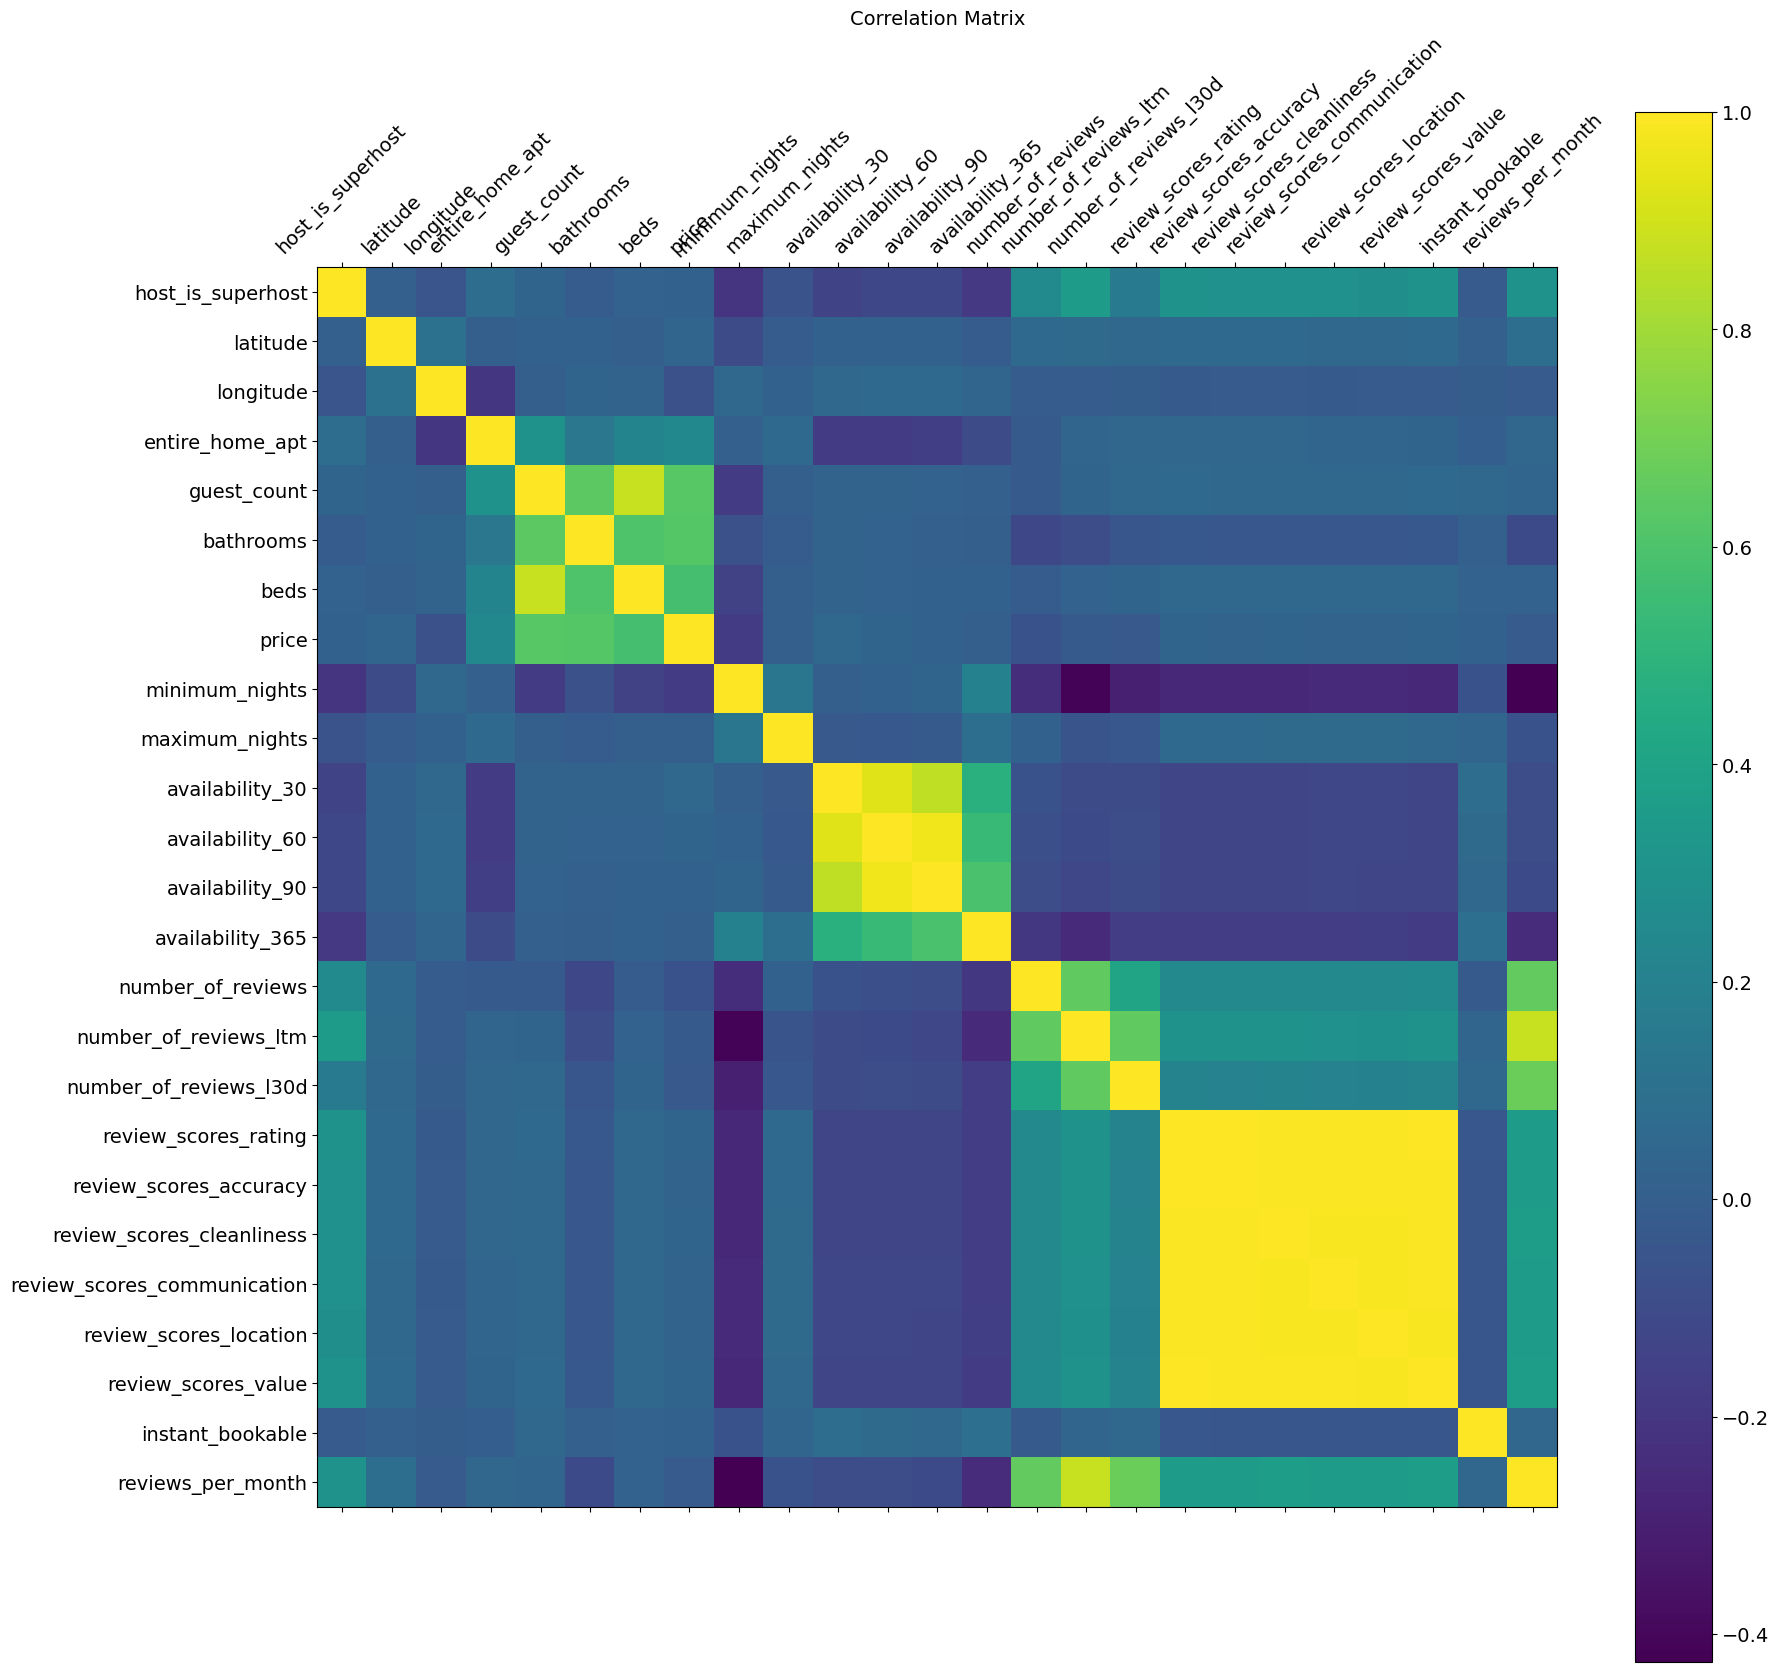

In [32]:
#formatting the heat map by adding labels, a legend and changing the size 
f = plt.figure(figsize=(20,20)) #this is changing figure size 
plt.matshow(df_bnb_selected.corr(), fignum=f.number) # this is the type of plot
plt.xticks(range(df_bnb_selected.shape[1]), df_bnb_selected.columns, fontsize=14, rotation = 45) #labels for x axis
plt.yticks(range(df_bnb_selected.shape[1]), df_bnb_selected.columns, fontsize=14) #labels for y axis
cb = plt.colorbar() #adding a color coded legend aka colorbar 
cb.ax.tick_params(labelsize=14) #this changes font size
plt.title('Correlation Matrix', fontsize=14) #adding a title to my graph

# Creating a correlation heatmap using seaborn

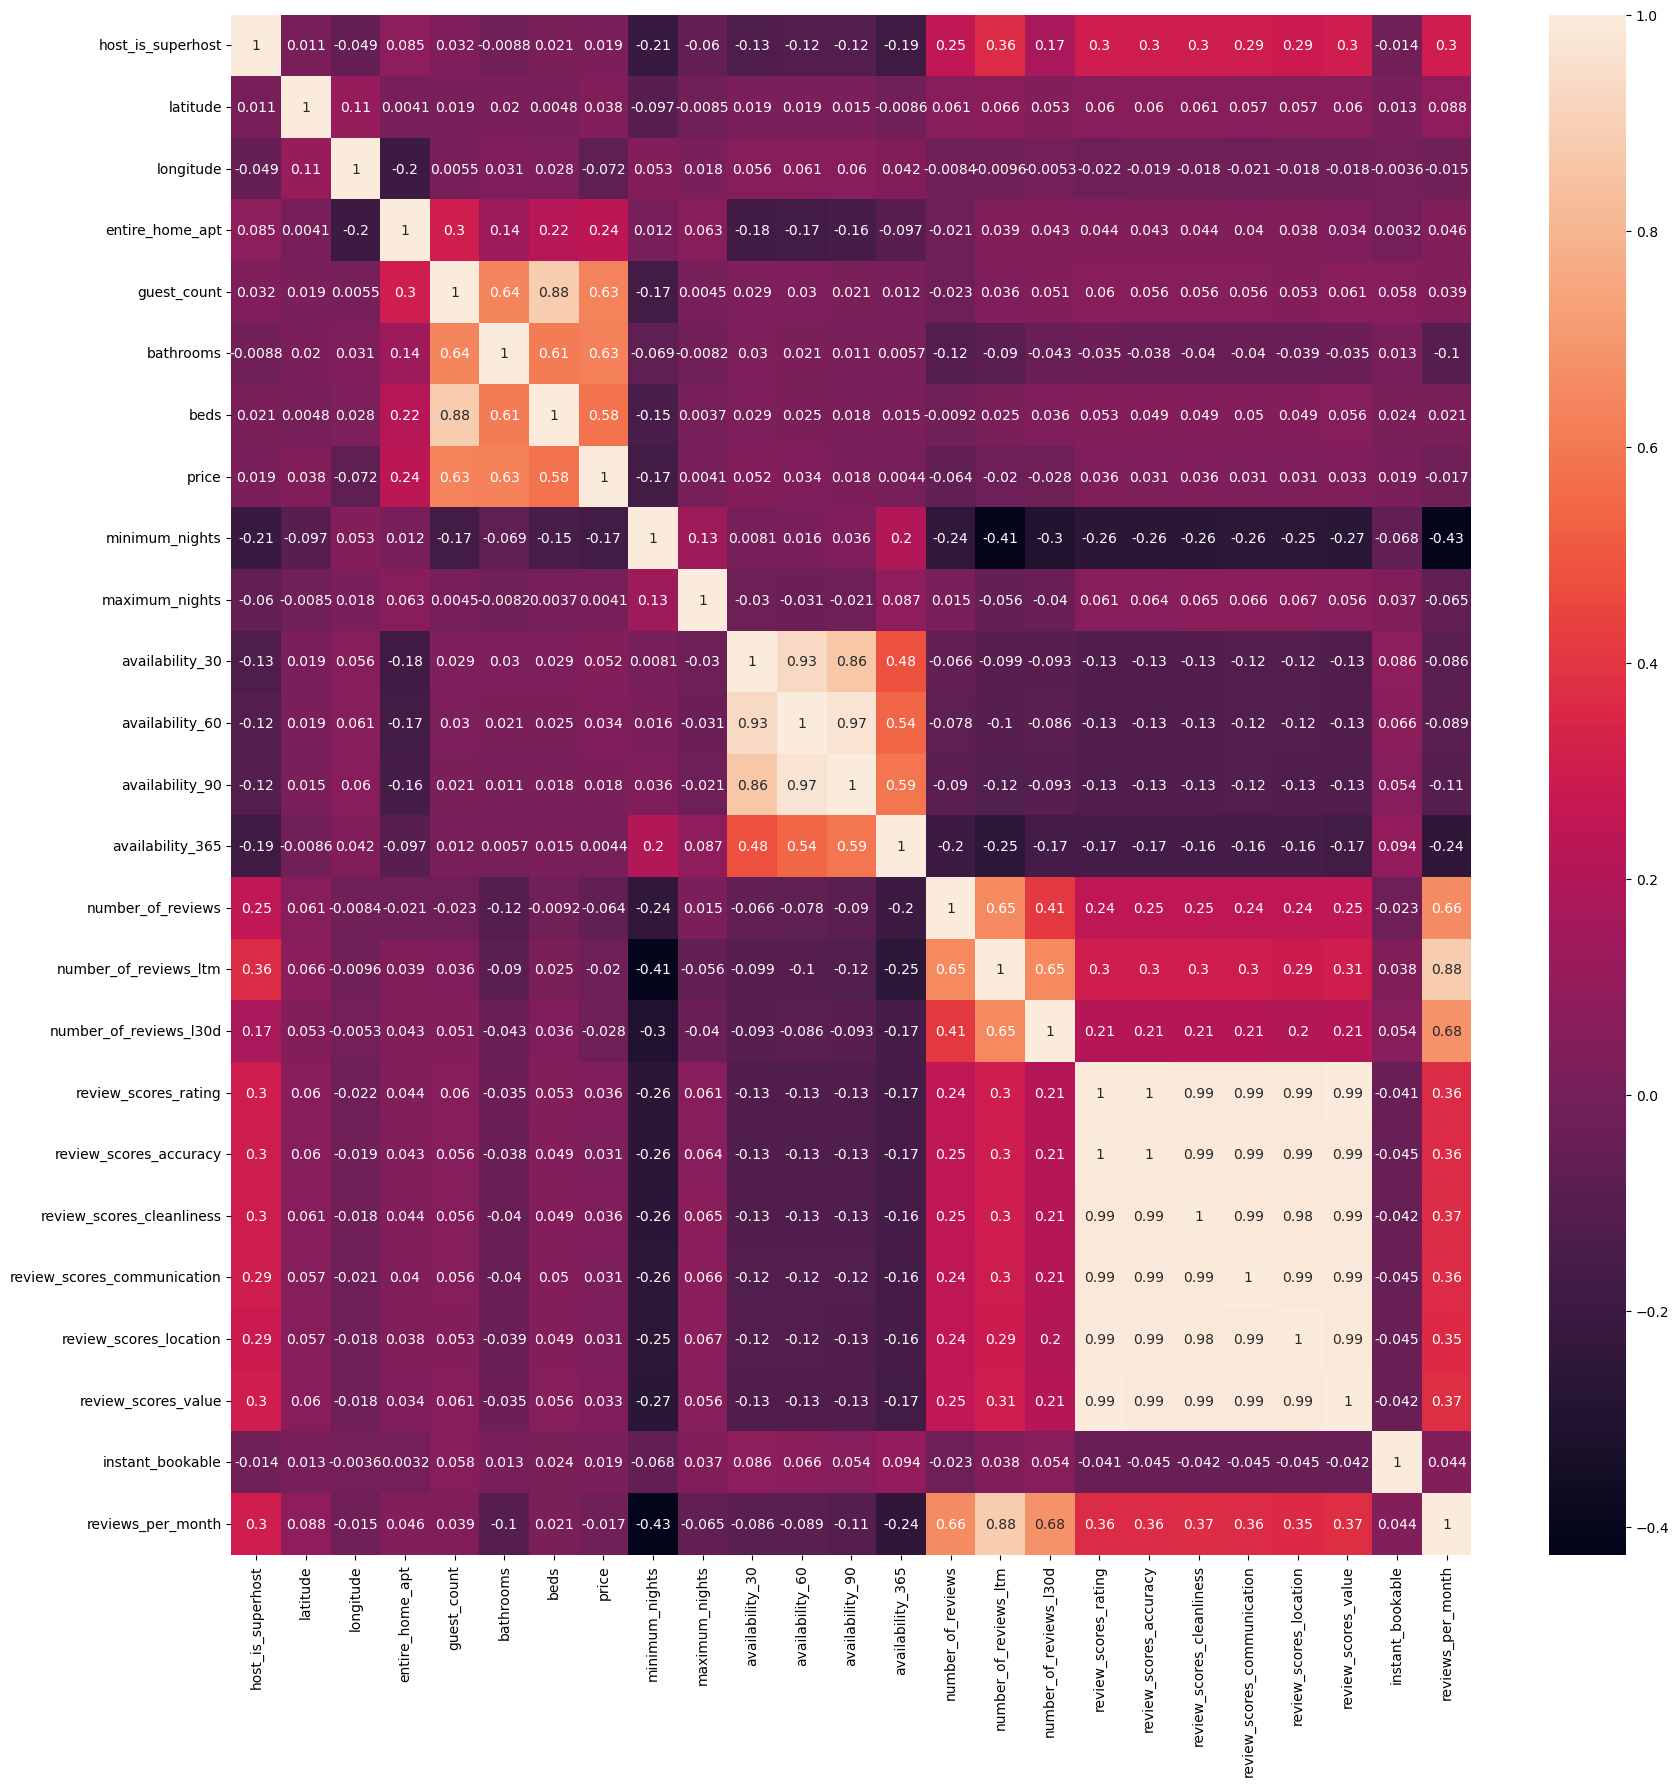

In [33]:
#create a subplot with matplotlib 
f,ax = plt.subplots(figsize = (20,20))

#creating the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots
corr = sns.heatmap(df_bnb_selected.corr(), annot = True, ax = ax)
# The 'annot' argument allows the plot to place the correlation coeffiecents on the heat map

# Here I am looking at all of my variables. I am interested in the effect on minimum_nights on all of my review categories as there seems to be a relatively strong negative relationship - so I would like to understand more about the realtionship between these variables. The other relationship that intrigues me is looking at the relationship of price to guest count, bathrooms and bedrooms. This makes sense because the larger the place the more expensive the price so a positive correlation seems plausible. 

# Scatterplots 

/Users/scarlettgrim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/j7/qc9dwgls32lgx6gfjlypwy6m0000gn/T/ipykernel_46351/1460210887.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


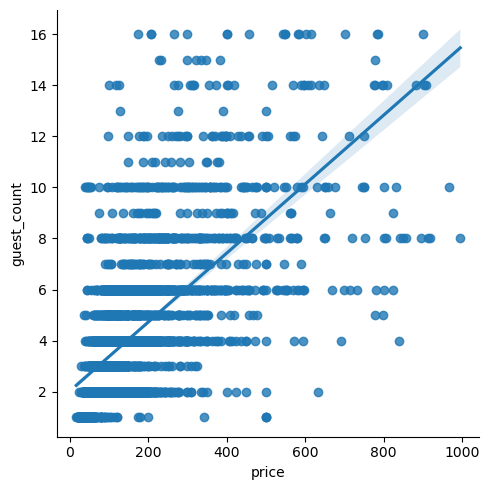

In [35]:
#creating a scatterplot for columns 'price' and 'guest_count'
sns.lmplot(x = 'price', y = 'guest_count', data = df_bnb_selected)
plt.tight_layout()

# This scatterplot looks at price and guest count. There is a diverse range of th eprice and the guest count. While the line of best fit shows a strong postive relationship further I feel that this relationship will need further examination given the spread of data. With the lowest guest count and the highest guest count you can see that the price range is lower, but this isn't consistent as guest count goes up - therefore requring further investigation. 

/Users/scarlettgrim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/j7/qc9dwgls32lgx6gfjlypwy6m0000gn/T/ipykernel_46351/1781176645.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


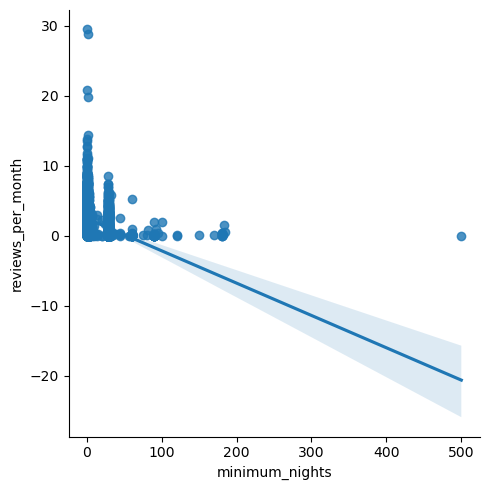

In [36]:
#creating a scatterplot for columns 'minimum_nights' and 'reviews_per_month'
sns.lmplot(x = 'minimum_nights', y = 'reviews_per_month', data = df_bnb_selected)
plt.tight_layout()

In [37]:
#defining a threshold to remove the outlier
threshold = 250 

In [38]:
#filtering minimum nights above the threshold 
df_filtered = df_bnb_selected[df_bnb_selected['minimum_nights'] <= threshold]

/Users/scarlettgrim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


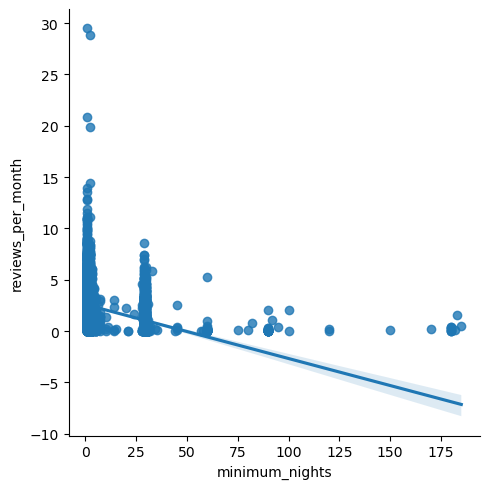

In [39]:
#new scatterplot without outlier
sns.lmplot(x='minimum_nights', y='reviews_per_month', data=df_filtered)

# This scatterplot looks at minimum nights along with reviews per month. The negative realtionship is very clear to me becasue the most reveiws happen with the least amount of stays required. However I want to investigate the peak around the 25 day minimum stay. I am guessing that this is the minimum threshold for longterm airbnbs and that is why we see an additional peak there. I think ultimately I may decide to create a flag column for short term and long term airbnb's to better distinguish this data. 

# Pair plots 

In [40]:
#new subset for pair plot
keep_columns = ['guest_count', 'bathrooms', 'beds', 'price', 'minimum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'reviews_per_month']
df_subset = df_bnb_selected[keep_columns]

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/Users/scarlettgrim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/j7/qc9dwgls32lgx6gfjlypwy6m0000gn/T/ipykernel_44597/617245933.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


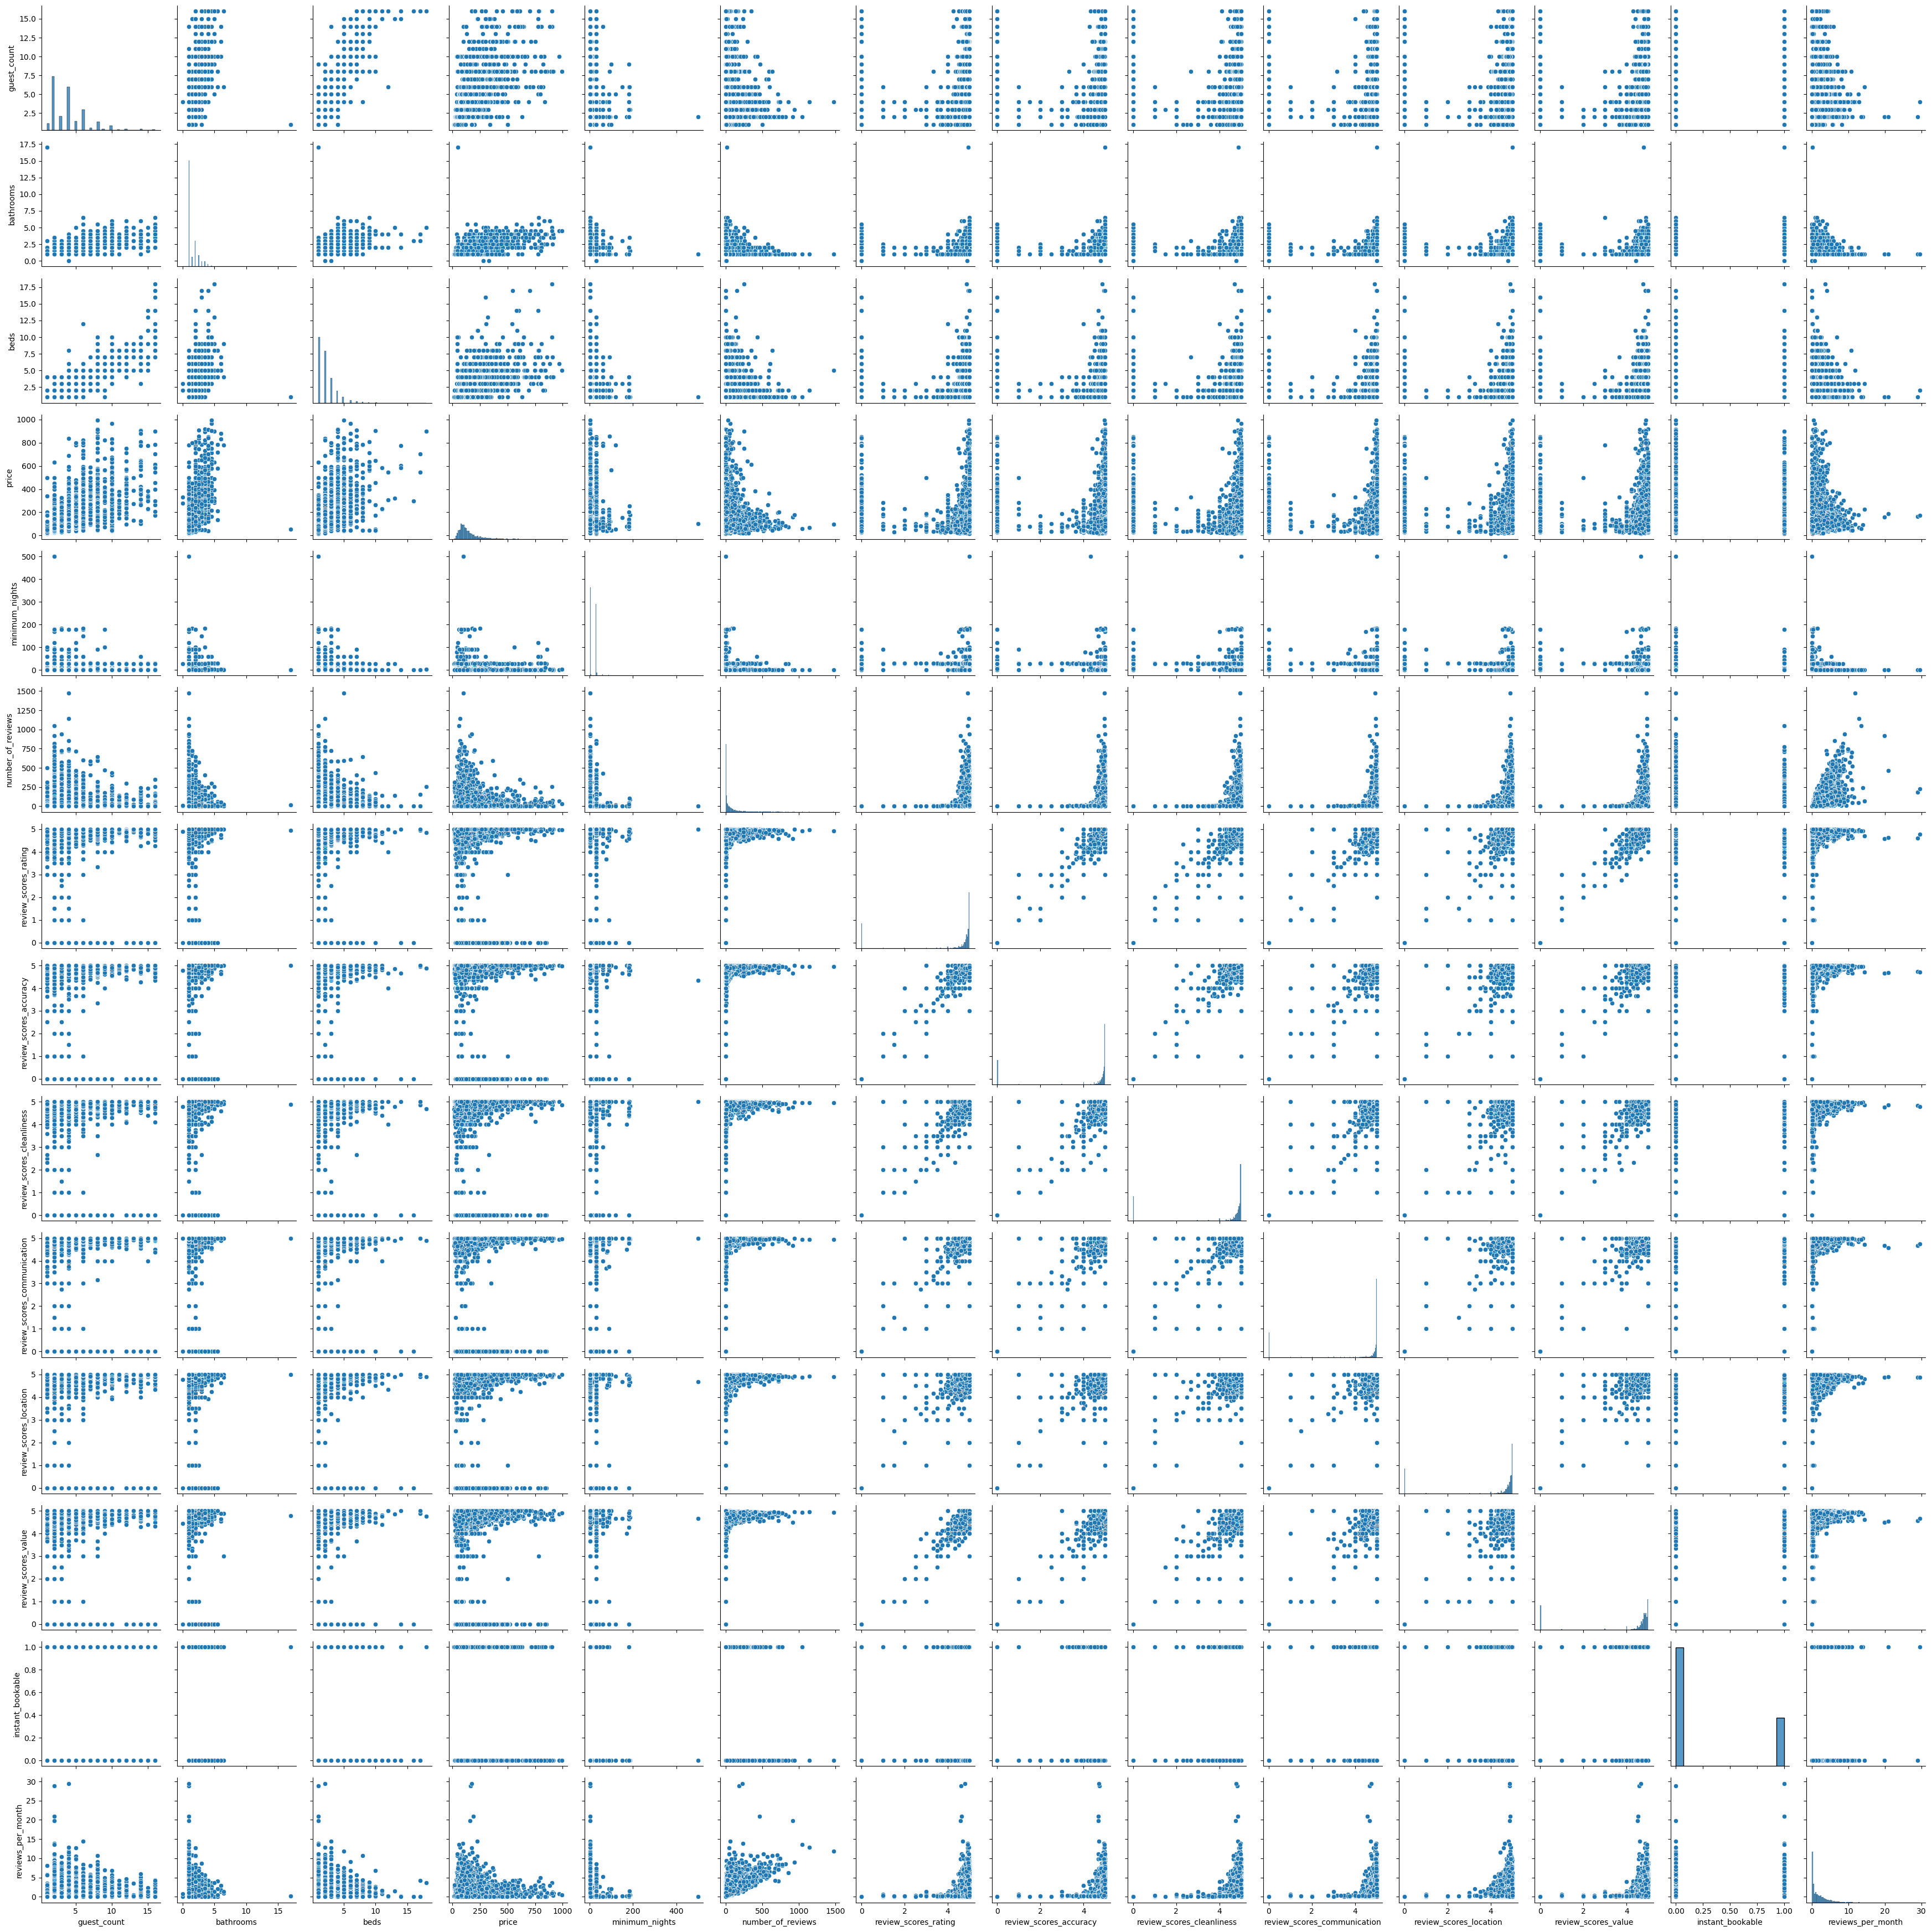

In [68]:
#creating the pair plot 
pairplot1 = sns.pairplot(df_subset)
plt.tight_layout()

# When I look at this pair plot it takes a second to understand what I am looking at. Once I got a sense of it I found a few interesting pairs of vairables that seem to have some sort of relationship. First I want to look at bathrooms and revies per month. For some reason it seems that less bathrooms = more reviews and this intrigues me. Additionally I want to look at price and reviews per month as it seems that a lower price point indicates more reviews a month. I want to look into if these are high reviews or low reviews. I also want to look at price compared to total amount of reviews to try and understand this relationship outside of a 'monthly' persepctive. I also see an interesting relationship between minimum nights and reviews per month and I am wondering if this is because people are having shorter stays. I want tolook into this in the future as well. 

# Categorical plots 

In [41]:
#Creating a categorical variable that splits up the "review_scores_rating" column into categories

# creating a histogram before making categories 

<Axes: xlabel='review_scores_rating', ylabel='Count'>

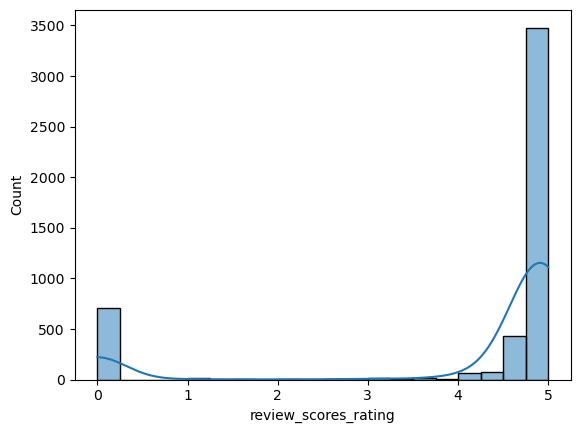

In [42]:
#creating a histogram before making categories
sns.histplot(df_airbnb['review_scores_rating'], bins = 20 , kde = True)

In [43]:
#creating categories for reveiw_scores_rating
df_airbnb.loc[df_airbnb['review_scores_rating'] == 0, 'Rating category'] = 'No ratings'

In [47]:
#creating categories for reveiw_scores_rating
df_airbnb.loc[(df_airbnb['review_scores_rating'] > 0) & (df_airbnb['review_scores_rating'] < 4.75 ), 'Rating category'] = 'Low rating'

In [48]:
#creating categories for reveiw_scores_rating
df_airbnb.loc[df_airbnb['review_scores_rating'] >= 4.75, 'Rating category'] = 'High rating'

In [49]:
#checking value counts
df_airbnb['Rating category'].value_counts(dropna = False)

Rating category
High rating    3479
No ratings      708
Low rating      629
Name: count, dtype: int64

In [50]:
df_airbnb.columns

Index(['id', 'host_id', 'host_since', 'host_is_superhost', 'location',
       'latitude', 'longitude', 'property_type', 'room_type', 'guest_count',
       'bathrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'entire_home_apt', 'Rating category'],
      dtype='object')

/Users/scarlettgrim/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/j7/qc9dwgls32lgx6gfjlypwy6m0000gn/T/ipykernel_46351/2709024487.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


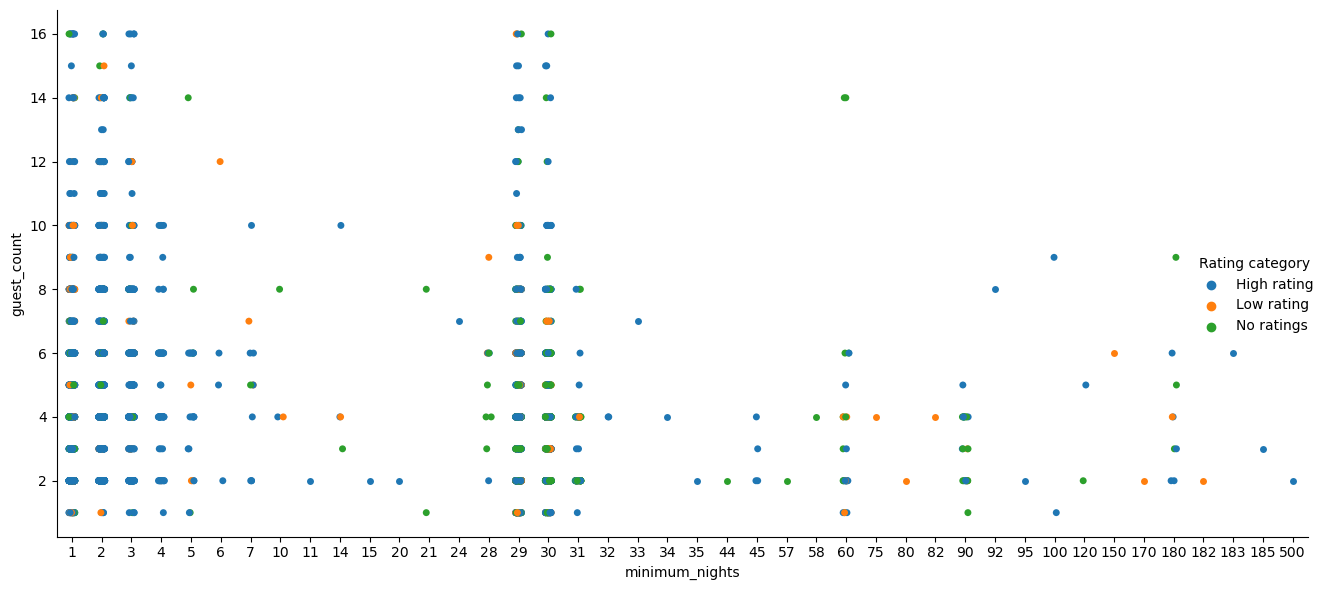

In [59]:
#creating a categroical plot in seaborn using the rating categories 
catplot = sns.catplot(x='minimum_nights', y='guest_count', hue='Rating category', data = df_airbnb, height = 6, aspect = 2)
plt.tight_layout()

In [54]:
#saving catplot fig 
catplot.savefig("catplot_1.png") 

# I see a mix of reviews throughout where there are plenty of airbnbs with no rating low rating and high rating. I put the threshold of a low rated airbnb relatively high due to the distribution of data. There are still more than 3x as many airbnbs in the high rating as the low rating. Given that the graph seems to have equal distribution across minimum nights I am left very curious about why there is such a large spread of no ratings and low ratings and what attributes tend to lead to an airbnb being placed in these categories. 

# Exporting current dataset

In [55]:
#exporting 
df_airbnb.to_csv(os.path.join(path, 'Data','Prepared Data', 'listings_checked_2.csv'))

# Defining hypotheses

In [ ]:
# As minimum nights increase reviews per month decrease. 
# I want to look at where a airbnb is located in terms of its "rating category" 
# I also want to look at rating category in terms of price to see if this gives a better understanding of what leads to a low rated airbnb